In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\Ai-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8148148148148148, Loss: 0.6111284185338903
Checkpoint 20, Accuracy: 0.8395061728395061, Loss: 0.5759208820484303
Checkpoint 30, Accuracy: 0.9135802469135802, Loss: 0.49760087331136066
Checkpoint 40, Accuracy: 0.9197530864197531, Loss: 0.38792984573929395
Checkpoint 50, Accuracy: 0.9197530864197531, Loss: 0.3758147557576497
Checkpoint 60, Accuracy: 0.8827160493827161, Loss: 0.42416597295690467
Checkpoint 70, Accuracy: 0.8703703703703703, Loss: 0.43000510886863424
Checkpoint 80, Accuracy: 0.9197530864197531, Loss: 0.32273603368688514
Checkpoint 90, Accuracy: 0.9012345679012346, Loss: 0.3132920441804109
Checkpoint 100, Accuracy: 0.9197530864197531, Loss: 0.30802825645164206
Checkpoint 110, Accuracy: 0.9135802469135802, Loss: 0.2407777221114547
Checkpoint 120, Accuracy: 0.9259259259259259, Loss: 0.22493980548999928
Checkpoint 130, Accuracy: 0.9444444444444444, Loss: 0.1933421912016692
Checkpoint 140, Accuracy: 0.9444444444444444, Loss: 0.17836254614370842
Checkpo

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

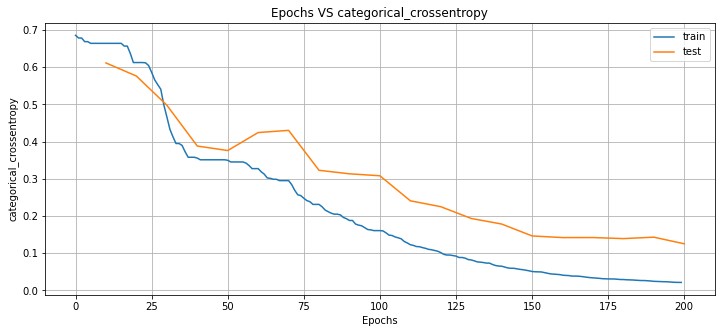

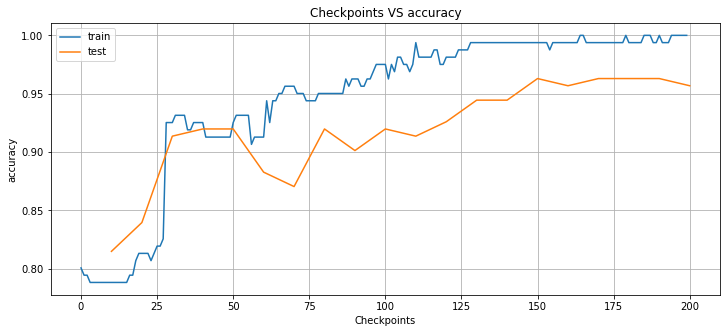

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.99033946 0.00735877 0.00230177]
[1. 0. 0.] <-> [0.9947391  0.00390323 0.0013576 ]
[1. 0. 0.] <-> [0.92123383 0.07573389 0.00303228]
[1. 0. 0.] <-> [0.9979377  0.0010044  0.00105788]
[1. 0. 0.] <-> [9.9626690e-01 2.7454437e-03 9.8769728e-04]
[1. 0. 0.] <-> [0.98536956 0.00103064 0.01359981]
[1. 0. 0.] <-> [0.9957624  0.00245602 0.00178166]
[1. 0. 0.] <-> [0.8417572  0.05586728 0.10237557]
[1. 0. 0.] <-> [0.6827731  0.001587   0.31563985]
[1. 0. 0.] <-> [0.98063546 0.01660205 0.00276246]
[1. 0. 0.] <-> [0.9977539  0.00108977 0.00115635]
[1. 0. 0.] <-> [0.99698335 0.00124504 0.00177151]
[1. 0. 0.] <-> [0.7975285  0.19890477 0.00356671]
[1. 0. 0.] <-> [0.99596065 0.00273291 0.00130648]
[1. 0. 0.] <-> [0.99363637 0.00127329 0.00509034]
[0. 1. 0.] <-> [6.5987166e-03 9.9296689e-01 4.3437525e-04]
[0. 0. 1.] <-> [0.8040169  0.00094181 0.19504131]
[0. 0. 1.] <-> [0.5338178  0.00067259 0.46550956]
[0. 1. 0.] <-> [1.9349413e-02 9.7995514e-01 6.9548190e-04]
[1. 0. 0.] <-> [0.99692

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8148148148148148, 'mean_square_error': 0.36665098512739425, 'categorical_crossentropy': 0.6111284185338903, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 30, 'tn_hit': 0, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 10} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 0.3466806886777186, 'categorical_crossentropy': 0.5759208820484303, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 26, 'tn_hit': 4, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 12}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 20} 


{'accuracy': 0.9135802469135802, 'mean_square_error': 0.28019387642758403, 'categorical_crossentropy': 0.49760087331136066, 'essential_metrics': {0: {'tp_hit': 73, 'fp_hit': 9, 'tn_hit': 21, 'fn_hit': 5}, 1: {'tp_hit': 15, 'fp_hit': 3, 'tn_hit': 89, 'fn_hit': 1}, 2: {'tp_hit': 6, 'fp_hit': 2, 'tn_hit': 92, 'fn_h

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 2.0354261 -3.        -2.6445258 -3.        -1.6615247]
 bias: 1.0774592161178589

Neuron 1: weights:
[-0.65937936 -2.994539    3.          2.2191417   2.6578877 ]
 bias: -1.1831438541412354

Neuron 2: weights:
[-2.0031254  3.         3.        -0.6305621 -2.158247 ]
 bias: -3.0

Neuron 3: weights:
[ 0.47644207 -3.         -1.4837922   3.          3.        ]
 bias: -1.9146993160247803

$
Layer 2
Neuron 0: weights:
[ 3. -3. -3. -3.]
 bias: 0.6996506452560425

Neuron 1: weights:
[-3.        -1.7332959  3.        -3.       ]
 bias: -0.288076788187027

Neuron 2: weights:
[-1.5710427  1.946955  -3.         3.       ]
 bias: -2.027125597000122

$

